In [1]:
!ls

3.7-predicting-house-prices.ipynb  lost+found		 plantDisease_01.ipynb
DLwP 3.3.ipynb			   plant_dataset_01.zip


In [1]:
#!rm -rf input

In [2]:
#!unzip -q plant_dataset_02.zip

In [11]:
!ls input

test  train  validation


In [60]:
from keras.applications.resnet50 import ResNet50

In [8]:
conv_base = ResNet50(weights='imagenet',
                    include_top=False)

94658560/94653016 [==============================] - 1s 0us/step


In [12]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'input'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [13]:
datagen = ImageDataGenerator(rescale=1./255)

In [32]:
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 2048))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [35]:
train_features, train_labels = extract_features(train_dir, 1826)
validation_features, validation_labels = extract_features(validation_dir, 596)
test_features, test_labels = extract_features(test_dir, 597)

Found 1826 images belonging to 3 classes.


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Found 596 images belonging to 3 classes.
Found 597 images belonging to 3 classes.


In [50]:
# flatten
train_features = np.reshape(train_features, (1826, 5 * 5 * 2048))
validation_features = np.reshape(validation_features, (596, 5 * 5 * 2048))
test_features = np.reshape(test_features, (597, 5 * 5 * 2048))

In [51]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=5 * 5 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [58]:
history = model.fit(train_features, train_labels,
                   epochs=100,
                   batch_size=20,
                   verbose=2,
                   validation_data=(validation_features,
                                   validation_labels))

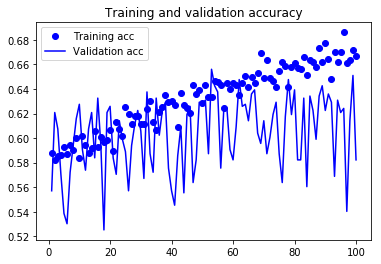

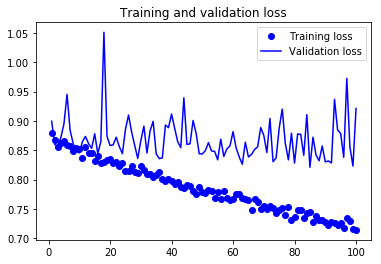

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# validation accuracy 60%